<a href="https://colab.research.google.com/github/sapto-nugroho/PCD/blob/main/PCD_Assignment02/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
Implementing following program from scratch

1. Convolution Function

2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for

3. Sharpening with blurring operation

4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.

Create your notebook with name as "PCD_Assignment02" and upload to GitHub. You need to provide your GitHub's code link to the text editor in submission form.

In [ ]:
!ls
!git pull https://github.com/sapto-nugroho/PCD.git
!ls

In [74]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import statistics as st
import pdb
import copy

##Image

In [75]:
def Acquire(src,size):
  #Image and Copy
  img = plt.imread(src)
  img_copy = copy.deepcopy(img)

  #Plot Image dan Copy
  fig, axs = plt.subplots(1, 2, figsize=(size, size))
  axs[0].imshow(img)
  axs[0].set_title(f"Original, shape, {img.shape}")
  axs[1].imshow(img_copy)
  axs[1].set_title(f"Copy, shape {img_copy.shape}")
  plt.tight_layout()
  plt.show()

  return img, img_copy

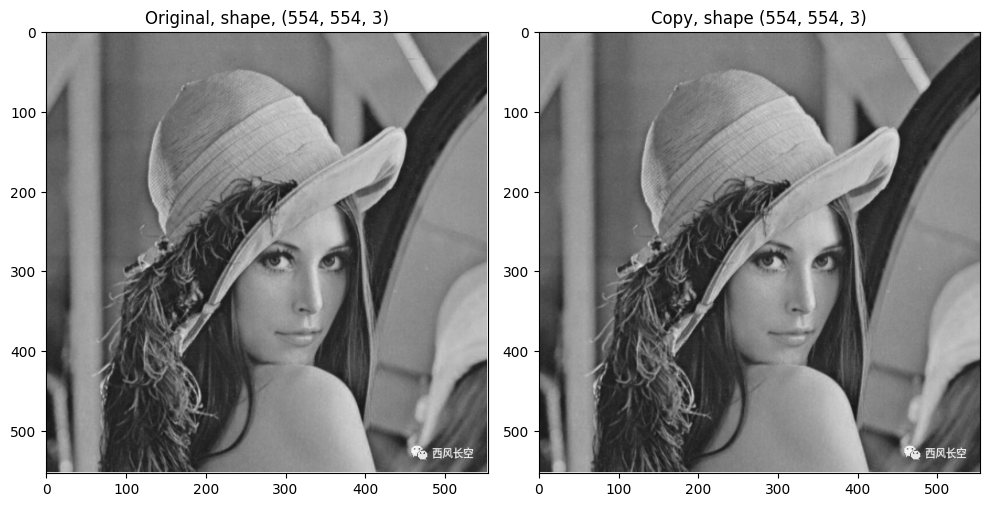

In [92]:
# img_path = '/content/PCD/PCD_Assignment01/grid.jpg'
# img_path = '/content/PCD/PCD_Assignment01/grid01.jpg'
# img_path = '/content/PCD/PCD_Assignment01/grid02.jpg'
# img_path = '/content/PCD/PCD_Assignment01/4x4.jpg'
# img_path = '/content/PCD/PCD_Assignment01/4x4color.jpg'
# img_path = '/content/PCD/PCD_Assignment01/8x8color.jpg'
# img_path = '/content/PCD/PCD_Assignment01/8x8white.jpg'
# img_path = '/content/PCD/PCD_Assignment01/16x16.jpg'
# img_path = '/content/PCD/PCD_Assignment01/64x64.jpg'
# img_path = '/content/PCD/PCD_Assignment01/128x128.jpg'
# img_path = '/content/PCD/PCD_Assignment01/color01.jpg'
# img_path = '/content/PCD/PCD_Assignment01/color02.jpg'
# img_path = '/content/PCD/PCD_Assignment01/clouds.jpg'
# img_path = '/content/PCD/PCD_Assignment01/mountain.jpg'

# img_path = '/content/PCD/PCD_Assignment02/4x4colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/8x8colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/female01.png'
# img_path = '/content/PCD/PCD_Assignment02/pattern.png'

img,img_copy = Acquire(img_path,10)
# print(img[0][0],img_copy[-1][-1])

In [102]:
img_copy.dtype

dtype('uint8')

In [100]:
 if img_copy.dtype != np.uint8:
  img_copy = img_copy*255
  img_copy = img_copy.astype(np.uint8)

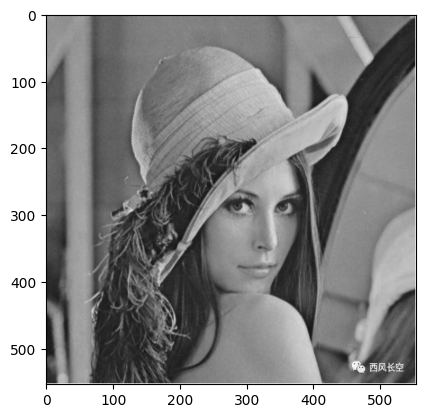

In [101]:
ker1 = np.array([[0,1,0],[1,-8,1],[0,1,0]])
plt.imshow(img_copy)
plt.show()

In [109]:
b,g,r = cv2.split(img_copy)
# print(b)

b_pad = np.pad(b, pad_width=1, mode='constant', constant_values=0)
# b_pad = np.pad(b, pad_width=((1, 1), (1, 1)), mode='constant', constant_values=0)
print(b_pad)

# img_copy = cv2.merge([r,g,b])
# plt.imshow(img_copy)
# plt.show()

[[  0   0   0 ...   0   0   0]
 [  0 157 157 ... 119 255   0]
 [  0 157 157 ... 114 255   0]
 ...
 [  0  35  36 ... 109 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [107]:
original_array = np.array([[1, 2], [3, 4]])

print(original_array)

# Add one zero row at the top and bottom, and one zero column on the left and right
padded_array = np.pad(original_array, pad_width=1, mode='constant', constant_values=0)
print("Padded array with uniform padding:")
print(padded_array)

# Add different amounts of padding
# pad_width=((top, bottom), (left, right))
padded_array_custom = np.pad(original_array, pad_width=((1, 2), (0, 1)), mode='constant', constant_values=0)
print("\nPadded array with custom padding:")
print(padded_array_custom)

[[1 2]
 [3 4]]
Padded array with uniform padding:
[[0 0 0 0]
 [0 1 2 0]
 [0 3 4 0]
 [0 0 0 0]]

Padded array with custom padding:
[[0 0 0]
 [1 2 0]
 [3 4 0]
 [0 0 0]
 [0 0 0]]
